In [ ]:
#property loan status prediction
#classification data

In [2]:
#import needed libraries
#do !pip install scikit-learn
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, precision_recall_fscore_support
import xgboost as xgb

In [4]:
df = pd.read_csv(r"data\Data\Loan Status Prediction\Loan_Status_train.csv")


In [8]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [14]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
df_gender = pd.get_dummies(df['Gender'], dtype=float)
df_married = pd.get_dummies(df['Married'], dtype=float)
df_dependents = pd.get_dummies(df['Dependents'], dtype=float)
df_education = pd.get_dummies(df['Education'], dtype=float)
df_self_employed = pd.get_dummies(df['Self_Employed'], dtype=float)
df_property_area = pd.get_dummies(df['Property_Area'], dtype=float)

In [18]:
df.Loan_Status.replace(('Y', 'N'), (1, 0), inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\503416202.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Loan_Status.replace(('Y', 'N'), (1, 0), inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\503416202.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Loan_Status.repl

In [22]:
data_new = pd.concat([df_gender, df_married, df_dependents, df_education, df_self_employed, df_property_area, df], axis=1)

In [24]:
data_new_f = data_new.drop(['Loan_ID','Gender','Married','Dependents','Education', 'Self_Employed','Property_Area'], axis=1)

In [28]:
data_new_f.describe()

,Female,Male,No,Yes,0,1,2,3+,Graduate,Not Graduate,...,Yes,Rural,Semiurban,Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,...,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.182410,0.796417,0.346906,0.648208,0.561889,0.166124,0.164495,0.083062,0.781759,0.218241,...,0.133550,0.291531,0.379479,0.328990,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,0.386497,0.402991,0.476373,0.477919,0.496559,0.372495,0.371027,0.276201,0.413389,0.413389,...,0.340446,0.454838,0.485653,0.470229,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


<Axes: >

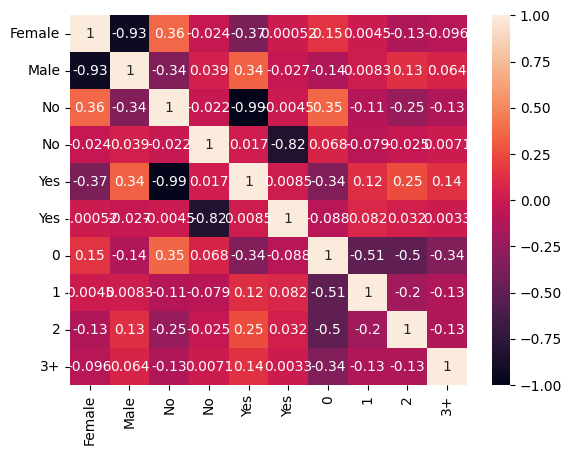

In [36]:
sns.heatmap(data_new_f[['Female','Male', 'No','Yes','0','1','2','3+']].corr(), vmin=-1,annot= True)

In [39]:
data_new_f.columns

Index(['Female', 'Male', 'No', 'Yes', '0', '1', '2', '3+', 'Graduate',
       'Not Graduate', 'No', 'Yes', 'Rural', 'Semiurban', 'Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [50]:
data_new_f.columns

Index(['Female', 'Male', 'No', 'Yes', '0', '1', '2', '3_plus', 'Graduate',
       'Not Graduate', 'se_no', 'se_yes', 'Rural', 'Semiurban', 'Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status'],
      dtype='object')

In [48]:
data_new_f.columns.values[10]="se_no"
data_new_f.columns.values[11]="se_yes"
data_new_f.columns.values[7]="3_plus"


In [51]:
feature_columns = ['Female', 'Male', 'No', 'Yes', '0', '1', '2', '3_plus', 'Graduate',
       'Not Graduate', 'se_no', 'se_yes', 'Rural', 'Semiurban', 'Urban',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History']

In [52]:
X = data_new_f[feature_columns]
y = data_new_f['Loan_Status']

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [61]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [72]:
nan_count = data_new_f.isna().sum()

In [73]:
print(nan_count)

Female                0
Male                  0
No                    0
Yes                   0
0                     0
1                     0
2                     0
3_plus                0
Graduate              0
Not Graduate          0
se_no                 0
se_yes                0
Rural                 0
Semiurban             0
Urban                 0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Loan_Status           0
dtype: int64


In [67]:
data_new_f[['LoanAmount','Loan_Amount_Term','Credit_History']]

,LoanAmount,Loan_Amount_Term,Credit_History
0,NaN,360.0,1.0
1,128.0,360.0,1.0
2,66.0,360.0,1.0
3,120.0,360.0,1.0
4,141.0,360.0,1.0
...,...,...,...
609,71.0,360.0,1.0
610,40.0,180.0,1.0
611,253.0,360.0,1.0
612,187.0,360.0,1.0


In [70]:
data_new_f['Credit_History'].fillna(0.0, inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\4074436482.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new_f['Credit_History'].fillna(0.0, inplace=True)


In [71]:
data_new_f.Credit_History.unique()

array([1., 0.])

In [74]:
data_new_f_1 = data_new_f.copy()

In [76]:
data_new_f['LoanAmount'].fillna(method='ffill', inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\385232631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new_f['LoanAmount'].fillna(method='ffill', inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\385232631.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_new_f['LoanAmount'].fillna(method='ffill', inplace=True)


In [77]:
data_new_f['Loan_Amount_Term'].fillna(method='ffill', inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\2348058298.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new_f['Loan_Amount_Term'].fillna(method='ffill', inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\2348058298.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_new_f['Loan_Amount_Term'].fillna(method='ffill', inplace=True)


In [83]:
data_new_f['Loan_Amount_Term'].fillna(method='backfill', inplace=True)

C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\1402036980.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_new_f['Loan_Amount_Term'].fillna(method='backfill', inplace=True)
C:\Users\kanna\AppData\Local\Temp\ipykernel_40916\1402036980.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_new_f['Loan_Amount_Term'].fillna(method='backfill', inplace=True)


In [93]:
nan_count = data_new_f.isna().sum()
print(nan_count)

Female               0
Male                 0
No                   0
Yes                  0
0                    0
1                    0
2                    0
3_plus               0
Graduate             0
Not Graduate         0
se_no                0
se_yes               0
Rural                0
Semiurban            0
Urban                0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Loan_Status          0
dtype: int64


In [86]:
data_new_f.shape

(614, 21)

In [87]:
data_new_f = data_new_f.dropna()

In [88]:
data_new_f.shape

(613, 21)

In [90]:
X = data_new_f[feature_columns]
y = data_new_f['Loan_Status']

In [91]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(490, 20)
(490,)
(123, 20)
(123,)


In [94]:
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)

c:\kannan\code\ml_analysis\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [95]:
y_pred = lr_model.predict(x_test)

0.7967479674796748
0.8125
0.9176470588235294
(array([0.74074074, 0.8125    ]), array([0.52631579, 0.91764706]), array([0.61538462, 0.86187845]), array([38, 85], dtype=int64))


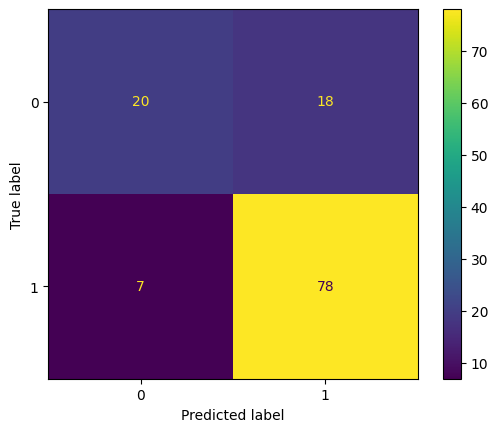

In [102]:
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#79.67% accuracy with Logistic Regression as data is linear
ConfusionMatrixDisplay(cm).plot()
print(precision_score(y_test, y_pred)) # tp/(tp+fp)
print(recall_score(y_test, y_pred)) # tp/(tp+fn)
print(precision_recall_fscore_support(y_test,y_pred))

In [104]:
#trying with default Decision Tree Classifier
dt_model = DecisionTreeClassifier()
#defualt criterion will be gini
dt_model = dt_model.fit(x_train,y_train)

In [105]:
y_pred = dt_model.predict(x_test)

0.6747967479674797
0.7848101265822784
0.7294117647058823
(array([0.47727273, 0.78481013]), array([0.55263158, 0.72941176]), array([0.51219512, 0.75609756]), array([38, 85], dtype=int64))


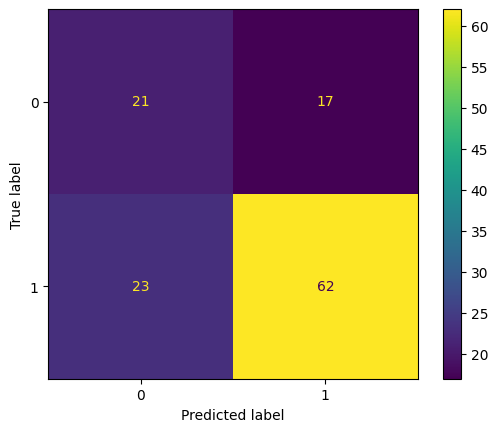

In [106]:
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#67.47% accuracy with basic Decision Tree Classifer
ConfusionMatrixDisplay(cm).plot()
print(precision_score(y_test, y_pred)) # tp/(tp+fp)
print(recall_score(y_test, y_pred)) # tp/(tp+fn)
print(precision_recall_fscore_support(y_test,y_pred))

In [107]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4)
#changing criterion to entropy instead of gini
dt_model = dt_model.fit(x_train,y_train)

In [108]:
y_pred = dt_model.predict(x_test)

0.7560975609756098
0.8021978021978022
0.8588235294117647
(array([0.625    , 0.8021978]), array([0.52631579, 0.85882353]), array([0.57142857, 0.82954545]), array([38, 85], dtype=int64))


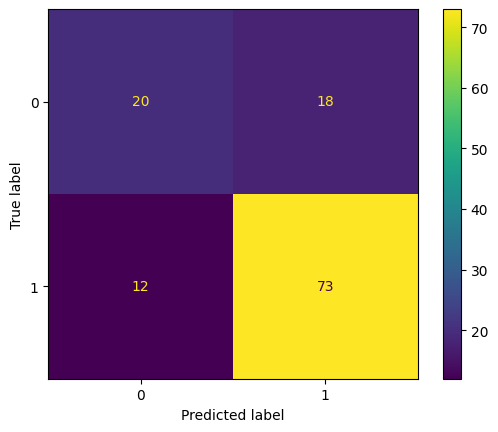

In [109]:
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#75.60% accuracy with impurity is entropy in Decision Tree Classifer
ConfusionMatrixDisplay(cm).plot()
print(precision_score(y_test, y_pred)) # tp/(tp+fp)
print(recall_score(y_test, y_pred)) # tp/(tp+fn)
print(precision_recall_fscore_support(y_test,y_pred))

In [110]:
rf_model = RandomForestClassifier()
rf_model = rf_model.fit(x_train, y_train)

In [111]:
y_pred = rf_model.predict(x_test)

0.7073170731707317
0.7634408602150538
0.8352941176470589
(array([0.53333333, 0.76344086]), array([0.42105263, 0.83529412]), array([0.47058824, 0.79775281]), array([38, 85], dtype=int64))


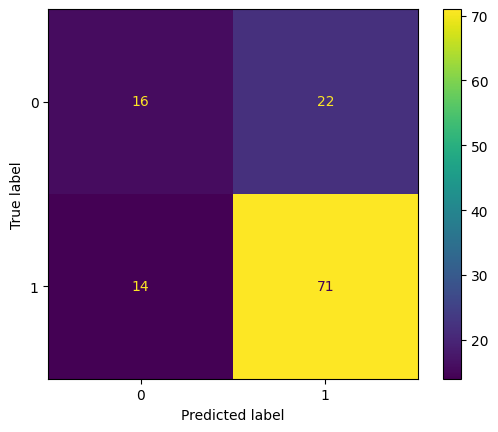

In [112]:
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#70.73% accuracy with impurity is entropy in Decision Tree Classifer
ConfusionMatrixDisplay(cm).plot()
print(precision_score(y_test, y_pred)) # tp/(tp+fp)
print(recall_score(y_test, y_pred)) # tp/(tp+fn)
print(precision_recall_fscore_support(y_test,y_pred))

In [113]:
feature_importances = pd.Series(rf_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

<Axes: >

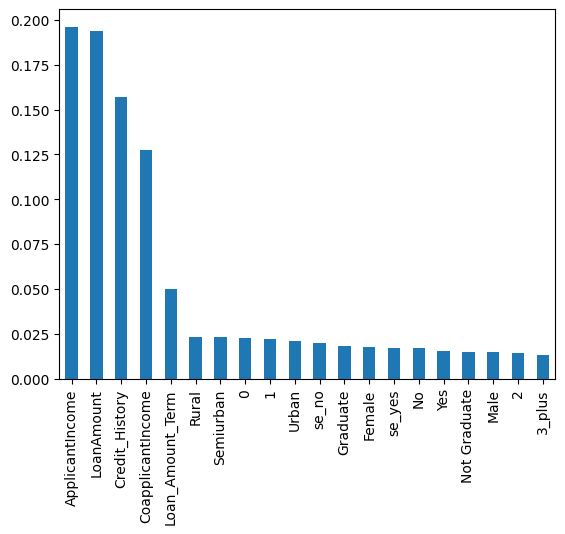

In [114]:
feature_importances.plot.bar()

In [115]:
#random forest hyper parameter tuning
param_dist = {
    'n_estimators':[random.randint(50,500)],
    'max_depth': [random.randint(1,20)]
}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=5,
    cv = 5
)
rand_search.fit(x_train, y_train)

c:\kannan\code\ml_analysis\.venv\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [20],
                                        'n_estimators': [83]})

In [116]:
best_model_rf = rand_search.best_estimator_

In [117]:
print(rand_search.best_params_)

{'n_estimators': 83, 'max_depth': 20}


In [118]:
y_pred = best_model_rf.predict(x_test)

0.7154471544715447
0.7551020408163265
0.8705882352941177
(array([0.56      , 0.75510204]), array([0.36842105, 0.87058824]), array([0.44444444, 0.80874317]), array([38, 85], dtype=int64))


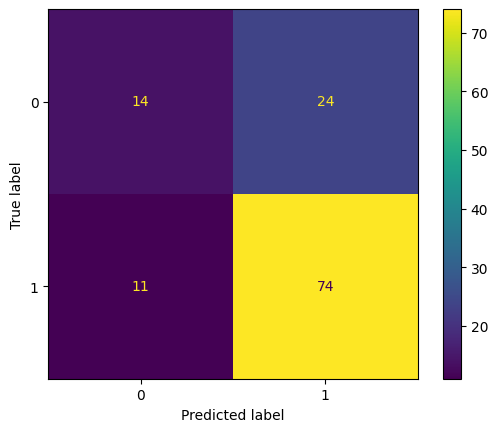

In [119]:
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#71.54% accuracy with best RF parameters
ConfusionMatrixDisplay(cm).plot()
print(precision_score(y_test, y_pred)) # tp/(tp+fp)
print(recall_score(y_test, y_pred)) # tp/(tp+fn)
print(precision_recall_fscore_support(y_test,y_pred))

<Axes: >

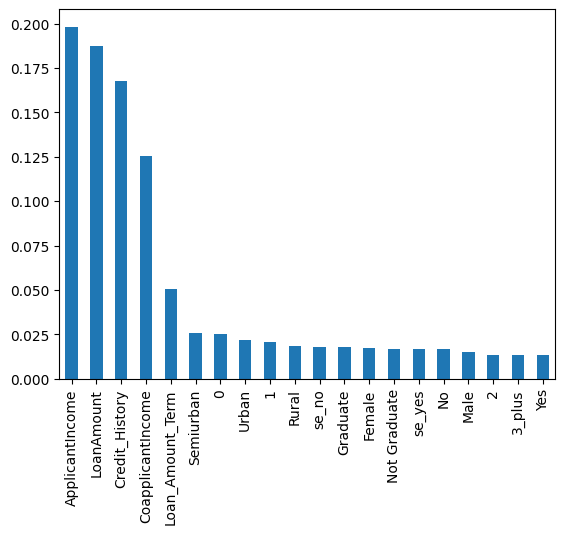

In [120]:
feature_importances = pd.Series(best_model_rf.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [122]:
rand_search.best_estimator_

RandomForestClassifier(max_depth=20, n_estimators=83)

In [123]:
xgb_model = xgb.XGBClassifier()
xgb_model = xgb_model.fit(x_train,y_train)
print(xgb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [124]:
y_pred = xgb_model.predict(x_test)

0.7154471544715447
0.7777777777777778
0.8235294117647058
(array([0.54545455, 0.77777778]), array([0.47368421, 0.82352941]), array([0.50704225, 0.8       ]), array([38, 85], dtype=int64))


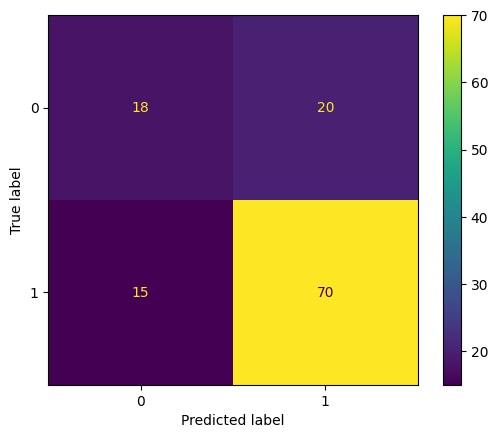

In [125]:
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#71.54% accuracy with best RF parameters
ConfusionMatrixDisplay(cm).plot()
print(precision_score(y_test, y_pred)) # tp/(tp+fp)
print(recall_score(y_test, y_pred)) # tp/(tp+fn)
print(precision_recall_fscore_support(y_test,y_pred))

<Axes: >

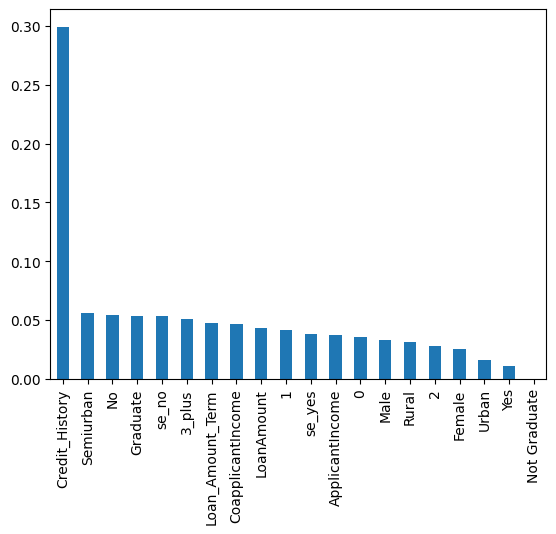

In [132]:
feature_importances = pd.Series(xgb_model.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [126]:
#XGBoost classifier using Grid Search cv

param1 = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2)
}

gs = GridSearchCV(estimator = xgb.XGBClassifier(
    learning_rate=0.1,
    n_estimators=150,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=4,
    scale_pos_weight=1,
    seed=20),
    param_grid=param1,
    scoring='roc_auc', n_jobs=4, cv=5)
gs.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=150,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=4,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='roc_auc')

In [127]:
gs.best_score_

0.725503223918359

In [128]:
best_xgb = gs.best_estimator_

In [129]:
y_pred = best_xgb.predict(x_test)

0.7154471544715447
0.7717391304347826
0.8352941176470589
(array([0.5483871 , 0.77173913]), array([0.44736842, 0.83529412]), array([0.49275362, 0.80225989]), array([38, 85], dtype=int64))


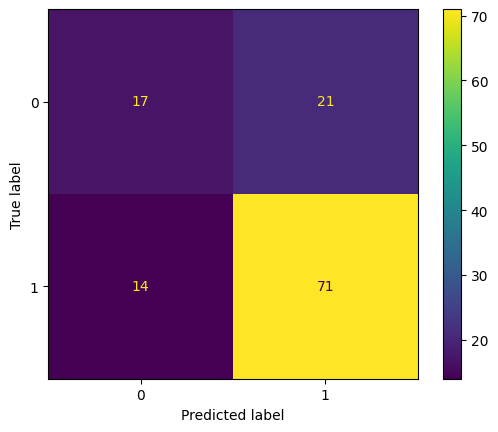

In [130]:
print(metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
#71.54% accuracy with best RF parameters
ConfusionMatrixDisplay(cm).plot()
print(precision_score(y_test, y_pred)) # tp/(tp+fp)
print(recall_score(y_test, y_pred)) # tp/(tp+fn)
print(precision_recall_fscore_support(y_test,y_pred))

<Axes: >

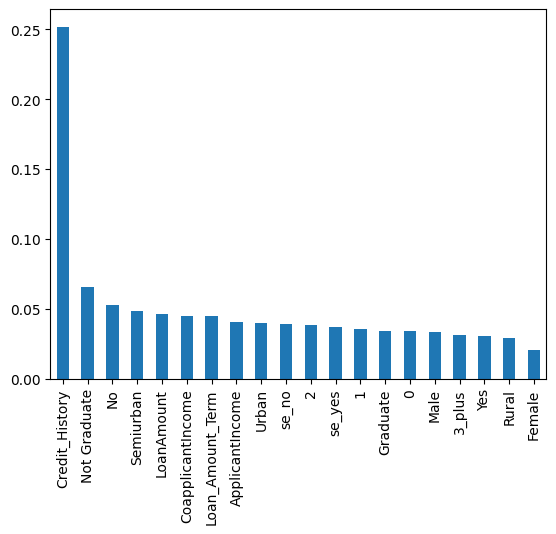

In [131]:
feature_importances = pd.Series(best_xgb.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_importances.plot.bar()

In [139]:
df_test = pd.read_csv(r"data\Data\Loan Status Prediction\Loan_Status_test.csv")

df_test_gender = pd.get_dummies(df_test['Gender'], dtype=float)
df_test_married = pd.get_dummies(df_test['Married'], dtype=float)
df_test_dependents = pd.get_dummies(df_test['Dependents'], dtype=float)
df_test_education = pd.get_dummies(df_test['Education'], dtype=float)
df_test_self_employed = pd.get_dummies(df_test['Self_Employed'], dtype=float)
df_test_property_area = pd.get_dummies(df_test['Property_Area'], dtype=float)

data_new_test = pd.concat([df_test_gender, df_test_married, df_test_dependents, df_test_education, df_test_self_employed, df_test_property_area, df_test], axis=1)
data_new_f_test = data_new_test.drop(['Loan_ID','Gender','Married','Dependents','Education', 'Self_Employed','Property_Area'], axis=1)

data_new_f_test.columns.values[10]="se_no"
data_new_f_test.columns.values[11]="se_yes"
data_new_f_test.columns.values[7]="3_plus"

In [140]:
#Eventhough regular Decision Tree Classifier gets around 75% accuracy i am considering xgboost model as it will have less variance

y_op = best_xgb.predict(data_new_f_test)

In [142]:
data_new_f_test.shape

(367, 20)

In [147]:
df_out = pd.concat([df_test['Loan_ID'],data_new_f_test, pd.DataFrame(y_op)], axis=1)

In [152]:
df_out.to_csv(r"outputs\loan_status_output.csv")

: 

In [1]:
pd.DataFrame(y_op).to_csv(r"outputs\loan_status_y_op_only.csv")

NameError: name 'pd' is not defined